In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import camb
from camb import model, initialpower
from camb.sources import GaussianSourceWindow, SplinedSourceWindow
import numpy as np
import sympy as sy
from sympy import symbols
from scipy import interpolate
from scipy import optimize
import matplotlib
from matplotlib import pyplot as plt

array([0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
       2. ])

In [21]:
z = np.arange(0.7,2.1,0.1)
n = np.array([17.5,19,18,16,15,13.2,12,10,7.5,5.5,3.5,3.2,2,1])

array([17.5, 19. , 18. , 16. , 15. , 13.2, 12. , 10. ,  7.5,  5.5,  3.5,
        3.2,  2. ,  1. ])

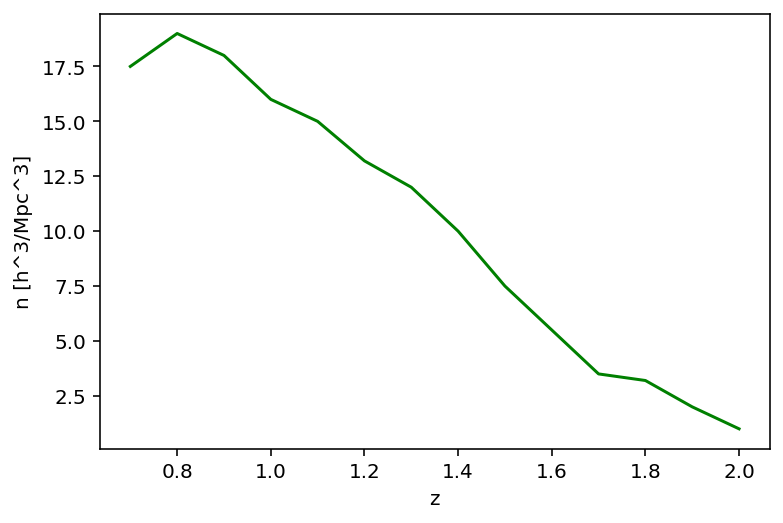

In [22]:
it, ax = plt.subplots()

ax.set_xlabel('z')
ax.set_ylabel('n*10^4 [h^3/Mpc^3]')

ax.plot(z, n, color='g', ls ='-')  #aggiungi gli errori


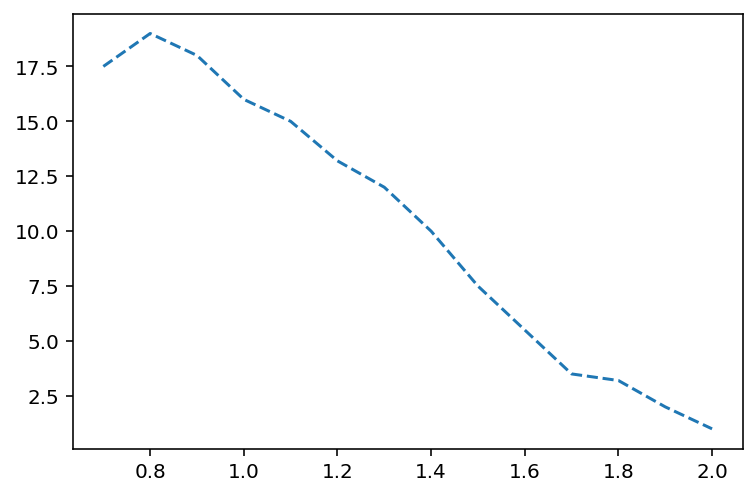

In [23]:
ng =  interpolate.interp1d(z,n,kind='cubic')
plt.plot(z, ng(z), '--')

In [26]:
def Ng (z):
    return ng(z)

array(19.)